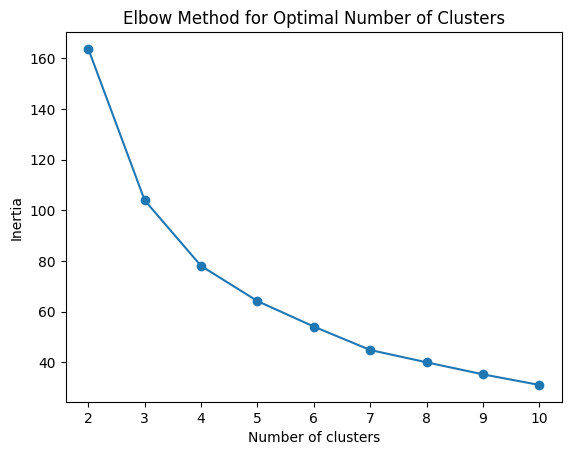

Davies-Bouldin Index: 0.8595340221510472
Silhouette Score: 0.37724079925411


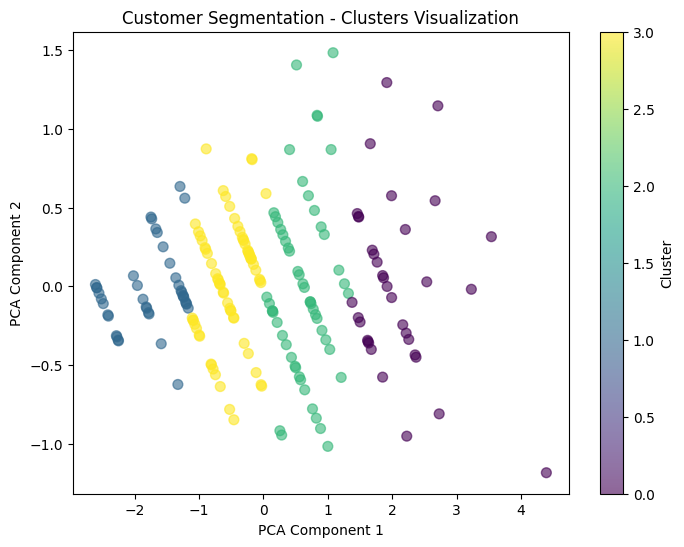

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load data
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge data
data = pd.merge(transactions, customers, on='CustomerID')

# Aggregate data at the customer level (total spending, transaction frequency)
grouped = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count'
}).rename(columns={
    'TotalValue': 'TotalSpending',
    'TransactionID': 'TransactionFrequency'
})

# Feature scaling
scaler = StandardScaler()
features = scaler.fit_transform(grouped)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(2, 11):  # Test for clusters between 2 and 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow method, let's assume 4 clusters for this example (you can change this based on the elbow curve)
kmeans = KMeans(n_clusters=4, random_state=42)
grouped['Cluster'] = kmeans.fit_predict(features)

# Evaluate clusters using the Davies-Bouldin Index and Silhouette Score
db_index = davies_bouldin_score(features, grouped['Cluster'])
silhouette_avg = silhouette_score(features, grouped['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

# Visualize clusters using PCA for 2D visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=grouped['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.title('Customer Segmentation - Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
